### **Import Library**

In [1]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all
 
import pandas as pd  # Pandas untuk manipulasi dan analisis data
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
from io import StringIO
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
 
import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
 
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
 
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
 
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

C:\Users\DELL\AppData\Local\Temp\ipykernel_15936\1098962176.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd  # Pandas untuk manipulasi dan analisis data
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### **Scraping Dataset**

In [2]:
result = reviews_all(
    'com.mobile.legends',
    lang='id',
    country='Id',
    sort=Sort.MOST_RELEVANT,
    count=1000,
    filter_score_with=None
)

### **Loading Dataset**

In [3]:
df = pd.DataFrame(np.array(result),columns=['reviews'])
df = df.join(pd.DataFrame(df.pop('reviews').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8c5e4320-3298-4006-8752-8e29eb49efae,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon diperhatikan masalah ping game yang naik...,5,12446,1.8.92.9701,2024-06-26 05:11:39,None,NaT,1.8.92.9701
1,3091b2ee-4747-420e-9f66-41f467b5c713,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sejauh ini gamenya tidak buruk atau semacam ny...,5,19041,1.8.92.9701,2024-06-19 13:23:06,None,NaT,1.8.92.9701
2,d11d2c3c-3e24-45e2-9f42-851c25e071fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin kesini makin buruk gamenya,mulai dari da...",1,27858,1.8.92.9701,2024-06-20 23:32:15,None,NaT,1.8.92.9701
3,3965951b-c9f5-41ac-a847-ba2e9443ab81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dalam permainan saat mati jaringan bagus. Seda...,2,1126,1.8.92.9701,2024-06-28 20:21:44,None,NaT,1.8.92.9701
4,5512c66c-b3ae-4163-b497-2ce172110ba8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"moonton maaf tapi,updetan baru jadi sering lag...",3,536,1.8.92.9701,2024-06-28 23:53:24,None,NaT,1.8.92.9701


In [4]:
df.to_csv("data/mlbb.csv")

In [5]:
data = pd.read_csv("data/mlbb.csv")
data.head()

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,8c5e4320-3298-4006-8752-8e29eb49efae,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon diperhatikan masalah ping game yang naik...,5,12446,1.8.92.9701,2024-06-26 05:11:39,NaN,NaN,1.8.92.9701
1,1,3091b2ee-4747-420e-9f66-41f467b5c713,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sejauh ini gamenya tidak buruk atau semacam ny...,5,19041,1.8.92.9701,2024-06-19 13:23:06,NaN,NaN,1.8.92.9701
2,2,d11d2c3c-3e24-45e2-9f42-851c25e071fc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Makin kesini makin buruk gamenya,mulai dari da...",1,27858,1.8.92.9701,2024-06-20 23:32:15,NaN,NaN,1.8.92.9701
3,3,3965951b-c9f5-41ac-a847-ba2e9443ab81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dalam permainan saat mati jaringan bagus. Seda...,2,1126,1.8.92.9701,2024-06-28 20:21:44,NaN,NaN,1.8.92.9701
4,4,5512c66c-b3ae-4163-b497-2ce172110ba8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"moonton maaf tapi,updetan baru jadi sering lag...",3,536,1.8.92.9701,2024-06-28 23:53:24,NaN,NaN,1.8.92.9701


In [6]:
data = data[['content','score','thumbsUpCount','at']]
data.rename(columns={'score': 'rating', 'content': 'comment'}, inplace=True)
data.head()

,comment,rating,thumbsUpCount,at
0,Mohon diperhatikan masalah ping game yang naik...,5,12446,2024-06-26 05:11:39
1,Sejauh ini gamenya tidak buruk atau semacam ny...,5,19041,2024-06-19 13:23:06
2,"Makin kesini makin buruk gamenya,mulai dari da...",1,27858,2024-06-20 23:32:15
3,Dalam permainan saat mati jaringan bagus. Seda...,2,1126,2024-06-28 20:21:44
4,"moonton maaf tapi,updetan baru jadi sering lag...",3,536,2024-06-28 23:53:24


In [7]:
data.isna().sum()

comment          0
rating           0
thumbsUpCount    0
at               0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment        22500 non-null  object
 1   rating         22500 non-null  int64 
 2   thumbsUpCount  22500 non-null  int64 
 3   at             22500 non-null  object
dtypes: int64(2), object(2)
memory usage: 703.3+ KB


### **Preprocessing Text**

In [10]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text
 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [11]:
slangwords = {"bug":"kesalahan","dll":"dan lain lain","ckp":"cukup","tw":"tau","aku":"saya","ga":"tidak","kalo":"kalau","ngelag":"lag","CUAPEKKK":"cape","tak":"tidak","memory":"memori",
              "trus":"terus","patah patah":"lag","ku":"saya","nggak":"saya","error":"kesalahan","full":"penuh","&":"dan","Adli":"adil","tdk":"tidak","Dpt":"dapat",
              "gk":"tidak","tollol":"tolol","smua":"semua","Thank's":"terima kasih",}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
 
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
 
    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [12]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data['text_clean'] = data['comment'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
data['text_casefoldingText'] = data['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data['text_slangwords'] = data['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data['text_tokenizingText'] = data['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
data['text_stopword'] = data['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
data['text_akhir'] = data['text_stopword'].apply(toSentence)

In [13]:
data.head(5)

,comment,rating,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Mohon diperhatikan masalah ping game yang naik...,5,12446,2024-06-26 05:11:39,Mohon diperhatikan masalah ping game yang naik...,mohon diperhatikan masalah ping game yang naik...,mohon diperhatikan masalah ping game yang naik...,"[mohon, diperhatikan, masalah, ping, game, yan...","[mohon, diperhatikan, ping, game, turun, kali,...",mohon diperhatikan ping game turun kali kesala...
1,Sejauh ini gamenya tidak buruk atau semacam ny...,5,19041,2024-06-19 13:23:06,Sejauh ini gamenya tidak buruk atau semacam ny...,sejauh ini gamenya tidak buruk atau semacam ny...,sejauh ini gamenya tidak buruk atau semacam ny...,"[sejauh, ini, gamenya, tidak, buruk, atau, sem...","[gamenya, buruk, segi, grafik, animasi, keren,...",gamenya buruk segi grafik animasi keren cantik...
2,"Makin kesini makin buruk gamenya,mulai dari da...",1,27858,2024-06-20 23:32:15,Makin kesini makin buruk gamenyamulai dari dar...,makin kesini makin buruk gamenyamulai dari dar...,makin kesini makin buruk gamenyamulai dari dar...,"[makin, kesini, makin, buruk, gamenyamulai, da...","[kesini, buruk, gamenyamulai, dark, systemmasa...",kesini buruk gamenyamulai dark systemmasalah j...
3,Dalam permainan saat mati jaringan bagus. Seda...,2,1126,2024-06-28 20:21:44,Dalam permainan saat mati jaringan bagus Sedan...,dalam permainan saat mati jaringan bagus sedan...,dalam permainan saat mati jaringan bagus sedan...,"[dalam, permainan, saat, mati, jaringan, bagus...","[permainan, mati, jaringan, bagus, hidup, berm...",permainan mati jaringan bagus hidup bermain ja...
4,"moonton maaf tapi,updetan baru jadi sering lag...",3,536,2024-06-28 23:53:24,moonton maaf tapiupdetan baru jadi sering lag ...,moonton maaf tapiupdetan baru jadi sering lag ...,moonton maaf tapiupdetan baru jadi sering lag ...,"[moonton, maaf, tapiupdetan, baru, jadi, serin...","[moonton, maaf, tapiupdetan, lag, bugjuga, ter...",moonton maaf tapiupdetan lag bugjuga terkadang...


### **Pelabelan**

In [14]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [15]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [16]:
results = data['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity_score'] = results[0]
data['polarity'] = results[1]
print(data['polarity'].value_counts())

polarity
negative    15442
positive     7058
Name: count, dtype: int64


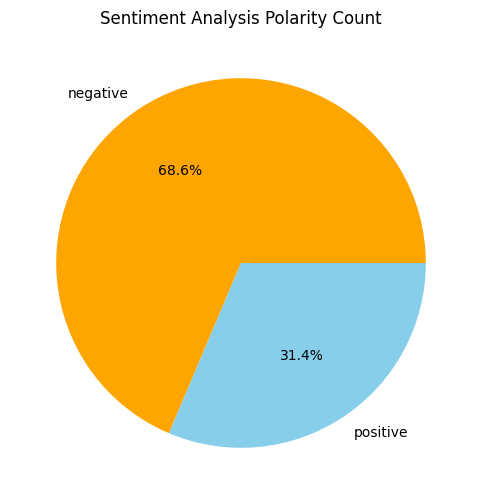

In [17]:
# Menghitung jumlah tiap polaritas
polarity_counts = data['polarity'].value_counts()

# Plot diagram batang
plt.figure(figsize=(10, 6))
plt.pie(polarity_counts.values, labels=polarity_counts.index, autopct='%1.1f%%', colors=['orange','skyblue'])
plt.title('Sentiment Analysis Polarity Count')
plt.show()

### **Eksplorasi Label**

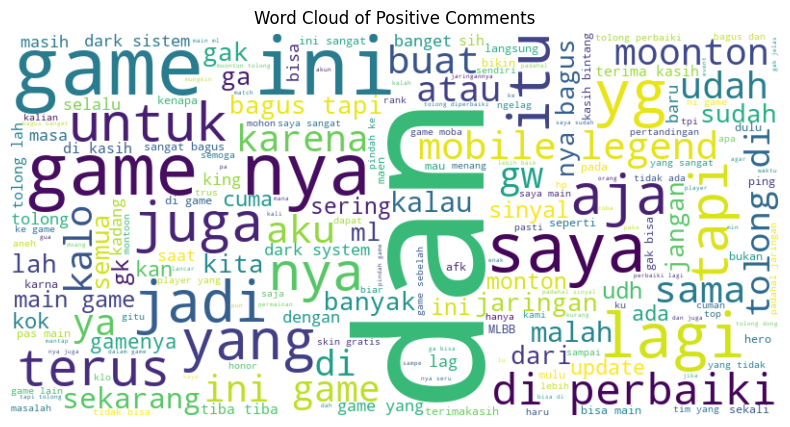

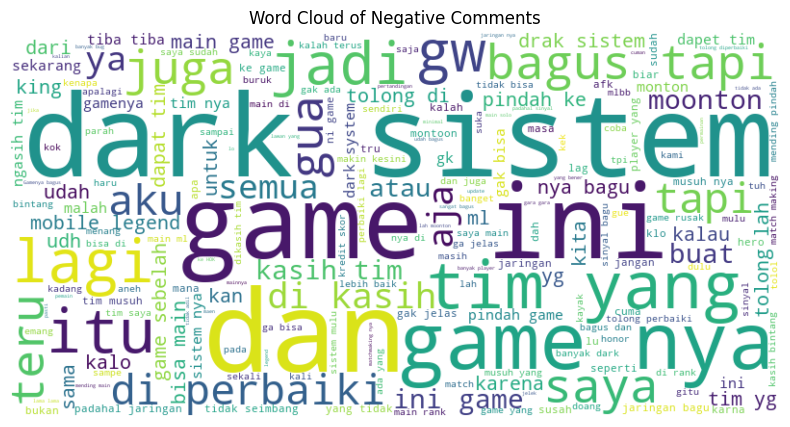

In [18]:
# Nama kolom teks dan polaritas
text_column = 'comment'
polarity_column = 'polarity'

# Pastikan kolom tersebut ada dalam DataFrame
if text_column in data.columns and polarity_column in data.columns:
    # Filter teks positif dan negatif
    positive_texts = " ".join(data[data[polarity_column] == 'positive'][text_column].tolist())
    negative_texts = " ".join(data[data[polarity_column] == 'negative'][text_column].tolist())

    # Membuat word cloud untuk teks positif
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Word Cloud of Positive Comments')
    plt.axis('off')
    plt.show()

    # Membuat word cloud untuk teks negatif
    wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_texts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Word Cloud of Negative Comments')
    plt.axis('off')
    plt.show()
else:
    print(f"Kolom '{text_column}' atau '{polarity_column}' tidak ditemukan dalam DataFrame.")

### **Data Splitting dan Ekstraksi Fitur dengan TF-IDF**

In [19]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = data['text_akhir']
y = data['polarity']
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)
 
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# Menampilkan hasil ekstraksi fitur
features_df

,adil,afk,aja,akun,ama,aneh,bagus,banget,bener,benerin,...,tpi,tuh,turun,udah,udh,update,war,wifi,win,yg
0,0.000000,0.000000,0.237876,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00000,...,0.0,0.0,0.362996,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.146130,0.0,0.0,0.0,0.000000,0.35925,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.253201,0.000000,0.000000,0.0,0.0,0.0,0.143681,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.196180,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.159130,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.312619,0.0,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.375097,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.235178,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.275991
22496,0.000000,0.247993,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00000,...,0.0,0.0,0.236729,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
22497,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00000,...,0.0,0.0,0.000000,0.000000,0.0,0.239617,0.343509,0.000000,0.0,0.000000
22498,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.31382,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

### **Modeling**

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Mendefinisikan parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)

# Melakukan GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train.toarray(), y_train)


# Prediksi dengan model terbaik
y_pred_train_lr_best = grid_search.predict(X_train.toarray())
y_pred_test_lr_best = grid_search.predict(X_test.toarray())

# Evaluasi akurasi model terbaik
accuracy_train_lr_best = accuracy_score(y_pred_train_lr_best, y_train)
accuracy_test_lr_best = accuracy_score(y_pred_test_lr_best, y_test)

# Menampilkan akurasi
print('Logistic Regression (Best) - accuracy_train:', accuracy_train_lr_best)
print('Logistic Regression (Best) - accuracy_test:', accuracy_test_lr_best)


Logistic Regression (Best) - accuracy_train: 0.8603888888888889
Logistic Regression (Best) - accuracy_test: 0.8524444444444444
